# Face Recognition 

## OpenCV

In [1]:
from PIL import Image
import cv2
import numpy as np
import os
import zipfile

Let's create the path

In [2]:
path = "../../Computer Vision Masterclass/Datasets/yalefaces.zip"
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [3]:
print(os.listdir("yalefaces/train"))

['subject01.glasses.gif', 'subject01.leftlight.gif', 'subject01.noglasses.gif', 'subject01.normal.gif', 'subject01.rightlight.gif', 'subject01.sad.gif', 'subject01.sleepy.gif', 'subject01.surprised.gif', 'subject01.wink.gif', 'subject02.glasses.gif', 'subject02.happy.gif', 'subject02.noglasses.gif', 'subject02.normal.gif', 'subject02.rightlight.gif', 'subject02.sad.gif', 'subject02.sleepy.gif', 'subject02.surprised.gif', 'subject02.wink.gif', 'subject03.centerlight.gif', 'subject03.happy.gif', 'subject03.noglasses.gif', 'subject03.normal.gif', 'subject03.rightlight.gif', 'subject03.sad.gif', 'subject03.sleepy.gif', 'subject03.surprised.gif', 'subject03.wink.gif', 'subject04.centerlight.gif', 'subject04.glasses.gif', 'subject04.happy.gif', 'subject04.noglasses.gif', 'subject04.normal.gif', 'subject04.rightlight.gif', 'subject04.sad.gif', 'subject04.sleepy.gif', 'subject04.wink.gif', 'subject05.centerlight.gif', 'subject05.glasses.gif', 'subject05.happy.gif', 'subject05.leftlight.gif', '

In [4]:
def get_image_data():
  paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
  # print(paths)
  faces = []
  ids = []
  for path in paths:
    # print(path)
    image = Image.open(path).convert('L')
    # print(type(image))
    image_np = np.array(image, 'uint8')
    # print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    # print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [5]:
ids, faces = get_image_data()

In [6]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

### Training the LBPH classifier

In [7]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(
    radius = 5,
    neighbors = 14,
    grid_x = 9,grid_y = 9
)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

## Recognizing faces

In [8]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [9]:
test_image = 'yalefaces/test/subject10.sad.gif'

In [10]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [11]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 36.85593915136333)

The first number is the class. The second value is the confidence

## Evaluating the classifier

In [12]:
paths = [os.path.join('yalefaces/test', f) for f in os.listdir('yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  # print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction,   _ = lbph_face_classifier.predict(image_np)
  expected_output = int( os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [13]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [14]:
predictions

array([ 4,  1,  4, 12,  3,  9,  5,  4,  5,  5,  6, 14,  7,  9,  8,  4,  7,
        9,  4, 10, 11, 11, 12, 12, 13, 13, 14, 14,  7, 15])

In [15]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

0.6333333333333333

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

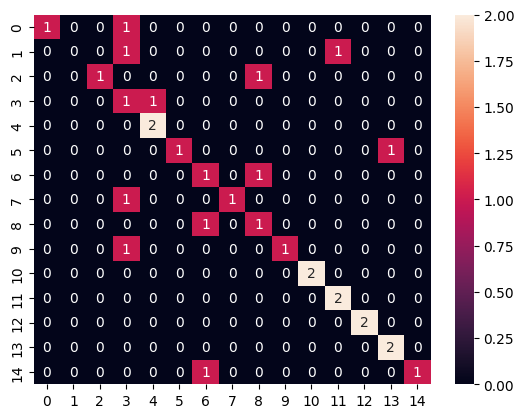

In [18]:
import seaborn
seaborn.heatmap(cm, annot = True);

## Dlib

In [2]:
import dlib
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

### Detecting facil points

In [3]:
os.listdir("../../Computer Vision Masterclass/Weights/")

['dlib_face_recognition_resnet_model_v1.dat',
 'mmod_human_face_detector.dat',
 'network_emotions.json',
 'pose_deploy_linevec_faster_4_stages.prototxt',
 'pose_iter_160000.caffemodel',
 'shape_predictor_68_face_landmarks.dat',
 'weights_emotions.hdf5']

In [4]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("../../Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")

In [5]:
image = cv2.imread("../../Computer Vision Masterclass/Images/people2.jpg")

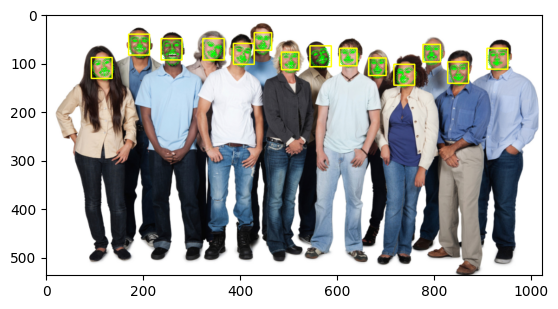

In [6]:
face_detection = face_detector(image, 1)
for face in face_detection:
    points = points_detector(image, face)
    for point in points.parts():
        cv2.circle(image, (point.x, point.y), 2, (0, 255, 0), 1)
    
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Detecting facial descriptors

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("../../Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")
face_descriptor_extractor = dlib.face_recognition_model_v1("../../Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat")
# resnet is cause is a convolutional network architecture

: 

In [ ]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
for path in paths:
#   print(path)
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    face_detection = face_detector(image_np, 1)
    for face in face_detection:
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(image_np, (l, t), (r, b), (0, 255, 255), 2)
        
        points = points_detector(image_np, face)
        for point in points.parts():
            cv2.circle(image_np, (point.x, point.y), 2, (0,255,0), 2)
        
    # plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    # plt.show()  
  